## Decision Trees and Ensemble Learning

Credit risk scoring project. Decision Tree

Dataset : https://github.com/gastonstat/CreditScoring 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
!wget $data

--2025-11-14 21:50:09--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.3’

CreditScoring.csv.3 100%[===================>] 178.21K  --.-KB/s    in 0.004s  

2025-11-14 21:50:10 (43.3 MB/s) - ‘CreditScoring.csv.3’ saved [182489/182489]



In [4]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [5]:
df = pd.read_csv(data)
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [8]:
status_values = {
    1: 'ok',
    2: 'default',
    0: ''
}

df.status = df.status.map(status_values)

In [9]:
df.head(3)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985


In [10]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [11]:
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [13]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [15]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [16]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [17]:
df_train.head(3)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
2815,default,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1461,default,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2935,ok,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612


In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Prepare target variable status by converting it from categorical to binary, where 0 represents ok and 1 represents default.

In [19]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

Delete the target variable from the train/val/test dataframe.

In [22]:

del df_train['status']
del df_val['status']
del df_test['status']

In [23]:
df_train.head(3)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612


Decision trees

In [24]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [25]:
xi = df_train.iloc[0].to_dict()

In [26]:
xi

{'seniority': 3,
 'home': 'rent',
 'time': 36,
 'age': 61,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 41,
 'income': 57.0,
 'assets': 12000.0,
 'debt': 0.0,
 'amount': 2500,
 'price': 3559}

In [27]:
assess_risk(xi)

'ok'

Decision Trees are powerful algorithms, capable of fitting complex datasets. The decision trees make predictions based on the bunch of *if/else* statements by splitting a node into two or more sub-nodes.

With versatility, the decision tree is also prone to overfitting. One of the reasons why this algorithm often overfits is its depth. It tends to memorize all the patterns in the train data but struggles to perform well on the unseen data (validation or test set).

To overcome the overfitting problem, we can reduce the complexity of the algorithm by reducing the depth size.

A decision tree with a depth of 1 is called `decision stump` and has only one split from the root.

**Classes, functions, and methods**:

- `DecisionTreeClassifier`: classification model from `sklearn.tree` class.
- `max_depth`: hyperparameter to control the maximum depth of decision tree algorithm.
- `export_text`: method from `sklearn.tree` class to display the text report showing the rules of a decision tree.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [29]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [30]:
train_dicts[:1]

[{'seniority': 3,
  'home': 'rent',
  'time': 36,
  'age': 61,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 41,
  'income': 57.0,
  'assets': 12000.0,
  'debt': 0.0,
  'amount': 2500,
  'price': 3559}]

In [31]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [32]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'marital=divorced', 'marital=married',
       'marital=separated', 'marital=single', 'marital=unk',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

on Validation dataset

In [37]:
y_pred = dt.predict_proba(X_val)[:, 1]


In [38]:
y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0.

In [40]:
roc_auc_score(y_val, y_pred)

0.6680305071756141

on Train dataset

In [41]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [42]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [43]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7660925386129352
val: 0.763427236430611


In [44]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1



In [45]:
print(export_text(dt))

|--- feature_24 <= 0.50
|   |--- feature_26 <= 6.50
|   |   |--- feature_12 <= 50.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  50.50
|   |   |   |--- class: 1
|   |--- feature_26 >  6.50
|   |   |--- feature_12 <= 99.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  99.50
|   |   |   |--- class: 0
|--- feature_24 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_12 <= 73.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  73.50
|   |   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- feature_27 <= 27.00
|   |   |   |--- class: 0
|   |   |--- feature_27 >  27.00
|   |   |   |--- class: 1



[Text(0.5, 0.875, 'records=no <= 0.5\ngini = 0.397\nsamples = 2673\nvalue = [1942.0, 731.0]'),
 Text(0.25, 0.625, 'seniority <= 6.5\ngini = 0.49\nsamples = 457\nvalue = [197, 260]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'income <= 50.5\ngini = 0.423\nsamples = 263\nvalue = [80, 183]'),
 Text(0.0625, 0.125, 'gini = 0.194\nsamples = 55\nvalue = [6, 49]'),
 Text(0.1875, 0.125, 'gini = 0.458\nsamples = 208\nvalue = [74, 134]'),
 Text(0.375, 0.375, 'income <= 99.5\ngini = 0.479\nsamples = 194\nvalue = [117, 77]'),
 Text(0.3125, 0.125, 'gini = 0.452\nsamples = 55\nvalue = [19, 36]'),
 Text(0.4375, 0.125, 'gini = 0.416\nsamples = 139\nvalue = [98.0, 41.0]'),
 Text(0.75, 0.625, 'job=partime <= 0.5\ngini = 0.335\nsamples = 2216\nvalue = [1745, 471]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'income <= 73.5\ngini = 0.284\nsamples = 1993\nvalue = [1651, 342]'),
 Text(0.5625, 0.125, 'gini = 0.474\nsamples = 373\nvalue = [229, 144]'),
 Text(0.6875, 0.125, 'gini = 0.215\nsamp

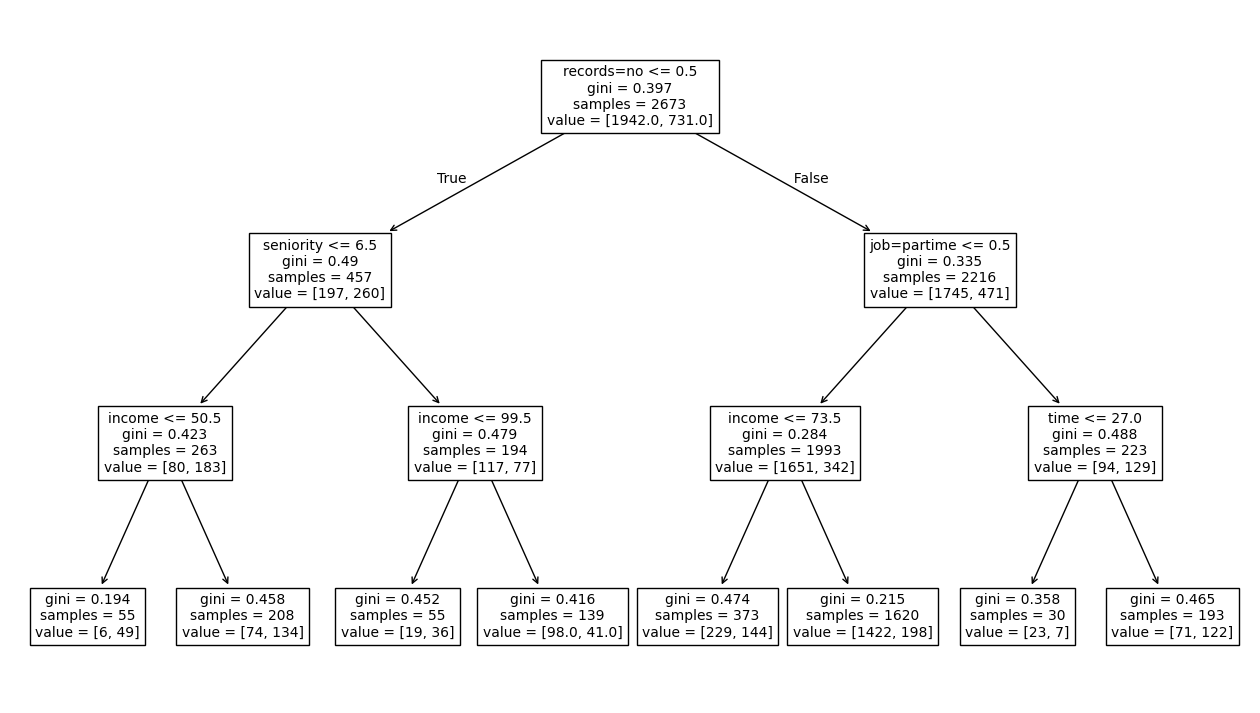

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 9))
plot_tree(dt, feature_names=dv.get_feature_names_out(), fontsize=10)

6.4 Decision tree learning algorithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

This lesson first reviews the topics learned in the previous lesson about how to train a decision tree using scikit-learn, and handle a decision tree model not generalizing well due to overfitting of the data. 

In this lesson, we learn about how to best split a decision tree and different classification criteria that can be used to split a tree. We dive deep in an example, splitting trees with `misclassification` criteria. Additionally, different stopping criteria to break the iterative tree split are discussed.     

* **Structure of a decision tree**: A decision tree is a data structure 
composed of **nodes** (which contain conditions) and **branches** (which represent the values for a condition: True or False).  The tree starts with a **root node**, which is the parent of two other nodes, and each of these nodes can also be the parent of others. At the last level of the tree, there are terminal nodes, also called **leaves**.

* **Depth of a decision tree**: The **depth** of a tree is the number of levels it has, or simply the length of the longest path from the root node to a leaf node.
  
* **Rules & Conditions, Thresholds**: The learning algorithm for a decision tree involves determining the best **conditions** to split the data at each node in order to achieve the best possible classifier. When there are many **features**, the algorithm considers each feature with its optimized **threshold** to determine the best feature for splitting at a particular node. In essence, at each node, the algorithm evaluates all possible thresholds for every feature and calculates the resulting misclassification rate. It then selects the condition
(feature and threshold) that yields the lowest impurity.

* **Misclassification rate**: After each split, the goal is to divide the data into two sets that are as **pure** as possible. This means that the data within each set should belong predominantly to either one class, or the other. Another way to describe this is to aim for the lowest possible **misclassification rate** (impurity). The misclassification rate is a weighted average of the error rates obtained after splitting the data into two sets.  The predicted class for each set is determined by the **majority class** present in this set.

* **Impurity criteria**: Common misclassification rate measurements are **GINI Impurity** and **Entropy**. It is also possible to use **MSE** for regression problems.
  
* **Decision trees can be used to solve regression problems**: While we focused on decision tree classifiers, it's important to note that decision trees can also be applied to regression problems using decision tree regressors.

* **Stopping Criteria**: The process of recursively splitting the data at each child node eventually stops based on certain **stopping criteria**. These criteria prevent the model from overfitting and include:

    *   The group is already **pure**: 0% impurity.
    *   The **maximum depth** has been reached.
    *   The group is **smaller** than the minimum size set for groups.
    *   The maximum number of **leaves/terminal nodes** has been reached.

#### Decision Tree Learning Algorithm in a Nutshell

*   At a node, find the best split.
*   Stop if max\_depth is reached.
*   For each child node, if the node is sufficiently large and not pure, repeat the process from the beginning.

In [47]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [48]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [49]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [50]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


In [51]:
from IPython.display import display

In [52]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [53]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [54]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [55]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [56]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


6.5 Decision trees parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In this lesson, we will discuss about different parameters used to control a Decision Tree (DT). Two of them, `max_depth` and `min_samples_leaf` have a greater importance than the others. We will further see how we first tune `max_depth` parameter and then move to tuning other parameters will help. After that, a dataframe will be created with all possible combinations of `max_depth`, `min_sample_leaf` and the auc score corresponding to them. These results will be visualized using a heatmap by pivoting the dataframe to easily determine the best possible `max_depth` and `min_samples_leaf` combination. Finally, the DT will be retrained using the identified parameter combination. The DT so trained will be viewed as a tree diagram, for visualizing decision rules.     

### Steps
* **Fine-Tuning Process:** iterate to find optimal parameter settings.
    *   Start by tuning `max_depth` with various values to determine a subset of optimal
depths.
    *   Then, using this subset, fine-tune the model further by exploring different
`min_samples_leaf` values.

    This method is computationally efficient for **large datasets**, though it may not be optimal for smaller ones.

* **Heatmaps for Visualization:** Store the scores (e.g., AUC) obtained during tuning in a pivot table, and create a heatmap with `seaborn` to easily identify high score areas, which helps pinpoint the optimal `max_depth` and `min_samples_leaf` combination.

**NB:** Choose parameter values that effectively control the tree's size and avoid values like 'nan' (Not a Number), even if they seem to lead to better scores.

### Importance of  `max_depth` and `min_samples_leaf`

*   **Controlling Overfitting:** these parameters play a critical role in preventing overfitting.
    *   `max_depth` limits the tree's complexity, preventing it from growing too deep and memorizing the training data.
    *   `min_samples_leaf` ensures that leaf nodes have a sufficient number of samples,
reducing the chance of creating nodes that are too specific to the training data.

*   **Impact on Bias and Variance:** They also affect the model's bias and variance.
    *   Increasing `max_depth` and decreasing `min_samples_leaf` can lead to a more complex model with lower bias but higher variance.
    *   Decreasing `max_depth` and increasing `min_samples_leaf` results in a simpler model with higher bias but lower variance.
      
It's then important to find the right balance between `max_depth` and `min_samples_leaf` to achieve optimal model performance.
This involves a trade-off between bias and variance, and the best values depend on the specific dataset and problem.

In [57]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.613
   2 -> 0.688
   3 -> 0.763
   4 -> 0.779
   5 -> 0.784
   6 -> 0.772
  10 -> 0.701
  15 -> 0.666
  20 -> 0.675
None -> 0.667


In [58]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print('%4s, %3d -> %.3f' % (depth, s, auc))
        scores.append((depth, s, auc))

   4,   1 -> 0.779
   4,   5 -> 0.779
   4,  10 -> 0.774
   4,  15 -> 0.771
   4,  20 -> 0.784
   4, 500 -> 0.671
   4, 100 -> 0.767
   4, 200 -> 0.765
   5,   1 -> 0.784
   5,   5 -> 0.787
   5,  10 -> 0.783
   5,  15 -> 0.780
   5,  20 -> 0.785
   5, 500 -> 0.671
   5, 100 -> 0.786
   5, 200 -> 0.778
   6,   1 -> 0.768
   6,   5 -> 0.788
   6,  10 -> 0.792
   6,  15 -> 0.795
   6,  20 -> 0.800
   6, 500 -> 0.671
   6, 100 -> 0.793
   6, 200 -> 0.789


In [59]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head(100)

,max_depth,min_samples_leaf,auc
0,4,1,0.779339
1,4,5,0.779339
2,4,10,0.773832
3,4,15,0.770767
4,4,20,0.783517
5,4,500,0.671368
6,4,100,0.766987
7,4,200,0.764929
8,5,1,0.784438
9,5,5,0.786916


In [61]:
df_scores.sort_values('auc', ascending=False).head(2)

,max_depth,min_samples_leaf,auc
20,6,20,0.799719
19,6,15,0.795124


In [62]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.779  0.784  0.768
5                 0.779  0.787  0.788
10                0.774  0.783  0.792
15                0.771  0.780  0.795
20                0.784  0.785  0.800
100               0.767  0.786  0.793
200               0.765  0.778  0.789
500               0.671  0.671  0.671

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

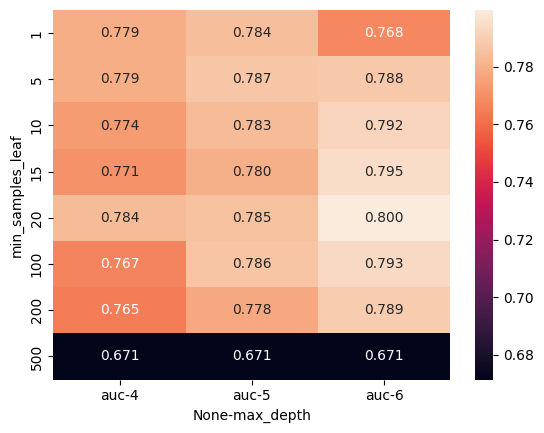

In [63]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [64]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [65]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- expenses <= 71.00
|   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |--- time <= 30.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- time >  30.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |--- marital=married <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- marital=married >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- expenses >  71.00
|   |   |   |   |--- time <= 54.00
|   |   |   |   |   |--- assets <= 3586.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3586.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- time >  54.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  73.50
|   |   |   |--- amount <= 1128.00
|   |   |   |   |--- assets <= 2600.00
|   |   |   |   |   |--- price <= 545.50
|   |   |   |   |   |   |--- cl

[Text(0.581140350877193, 0.9285714285714286, 'records=yes <= 0.5\ngini = 0.397\nsamples = 2673\nvalue = [1942.0, 731.0]'),
 Text(0.40131578947368424, 0.7857142857142857, 'job=partime <= 0.5\ngini = 0.335\nsamples = 2216\nvalue = [1745, 471]'),
 Text(0.49122807017543857, 0.8571428571428572, 'True  '),
 Text(0.2412280701754386, 0.6428571428571429, 'income <= 73.5\ngini = 0.284\nsamples = 1993\nvalue = [1651, 342]'),
 Text(0.13157894736842105, 0.5, 'expenses <= 71.0\ngini = 0.474\nsamples = 373\nvalue = [229, 144]'),
 Text(0.07017543859649122, 0.35714285714285715, 'seniority <= 1.5\ngini = 0.449\nsamples = 305\nvalue = [201, 104]'),
 Text(0.03508771929824561, 0.21428571428571427, 'time <= 30.0\ngini = 0.5\nsamples = 90\nvalue = [46, 44]'),
 Text(0.017543859649122806, 0.07142857142857142, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.05263157894736842, 0.07142857142857142, 'gini = 0.491\nsamples = 69\nvalue = [30, 39]'),
 Text(0.10526315789473684, 0.21428571428571427, 'marital=ma

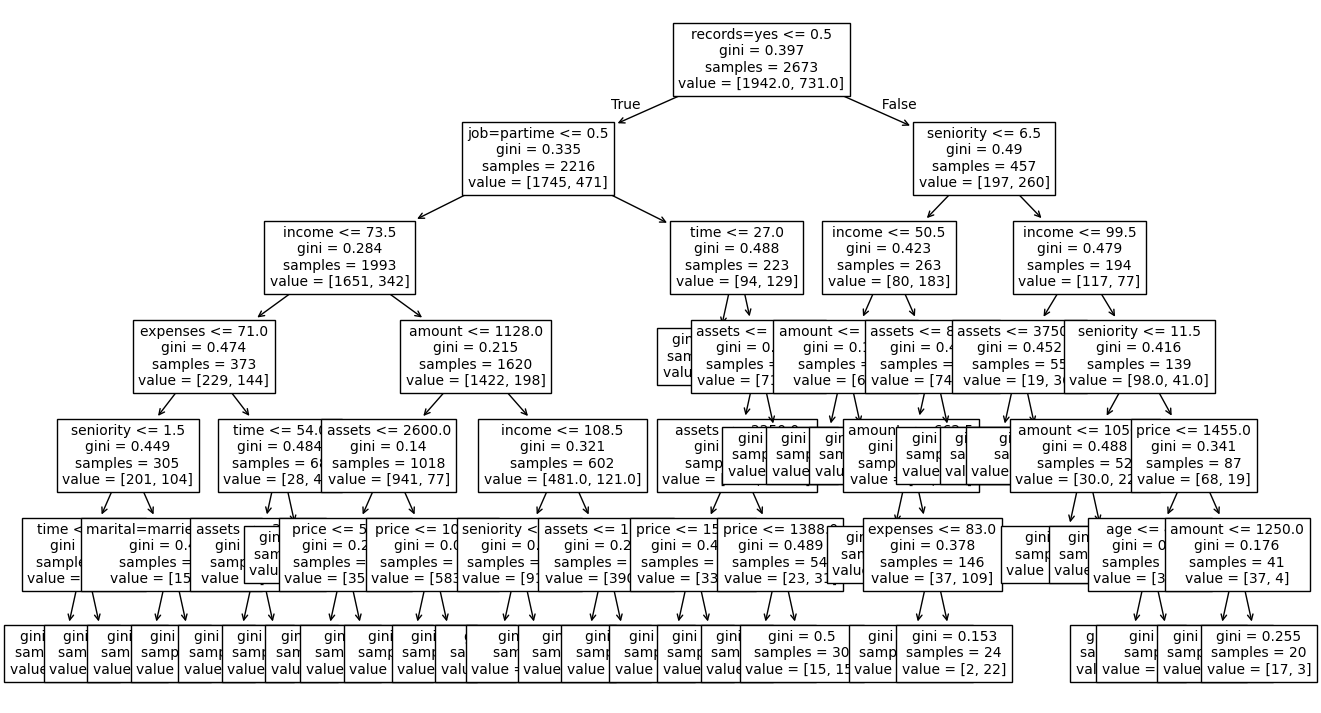

In [66]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 9))
plot_tree(dt, feature_names=dv.get_feature_names_out(), fontsize=10)

6.6 Ensembles and random forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

**Ensemble learning** is a machine learning paradigm where multiple models, often referred to as 'weak learners', are strategically combined to solve a particular computational intelligence problem. This approach frequently yields superior predictive performance compared to using a single model.

**Random Forest** is an example of ensemble learning where each model is a decision tree and their predictions are aggregated to identify the most popular result. Random forest only selects a random subset of features from the original data to make predictions. The 'randomness' in Random Forest stems from two key aspects: 

- Each tree is potentially trained on a bootstrapped sample of the original data, introducing randomness at the row level.
- At each node during tree construction, only a random subset of features is considered for splitting. This feature randomness helps decorrelate the trees, preventing overfitting and promoting generalization to unseen data.

**Bootstrapping** is a resampling technique where numerous subsets
of the data are created by sampling the original data with replacement. This means that
some data points may appear multiple times in a single bootstrap sample, while others may
be excluded. In Random Forest, each decision tree is trained on a distinct bootstrap sample,
further contributing to the diversity and robustness of the ensemble.

**Parameter tuning** is crucial for optimizing the performance of a
Random Forest model.  Two critical parameters are `max_depth`, which controls the maximum
depth of each decision tree, and `n_estimators`, which determines the number of trees in
the forest. Increasing `max_depth` allows for more complex trees, potentially leading to
overfitting. Conversely, a larger `n_estimators` generally improves model accuracy but
increases computational cost.

In random forests, the decision trees are trained independently to each other.

**Classes, functions, and methods**:

- `from sklearn.ensemble import RandomForestClassifier`: random forest classifier from sklearn ensemble class.
- `plt.plot(x, y)`: draw line plot for the values of y against x values.

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [69]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [73]:
df_scores.sort_values('auc', ascending=False).head(2)

,n_estimators,auc
18,190,0.836861
13,140,0.836401


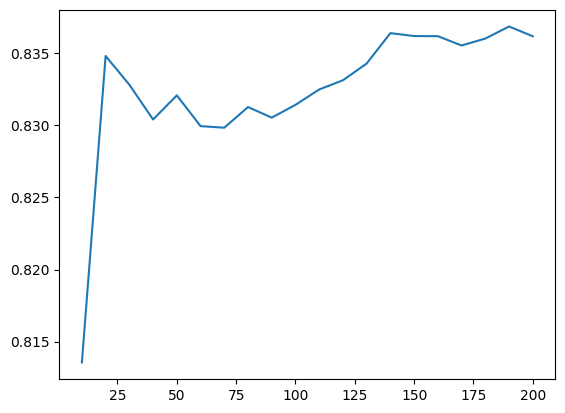

In [74]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [75]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [76]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

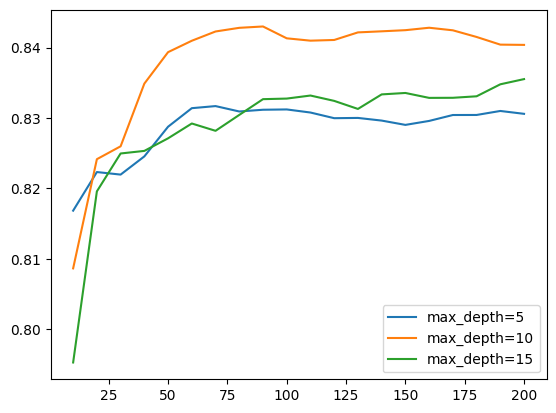

In [77]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()


In [78]:
max_depth = 10

In [79]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))


In [80]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

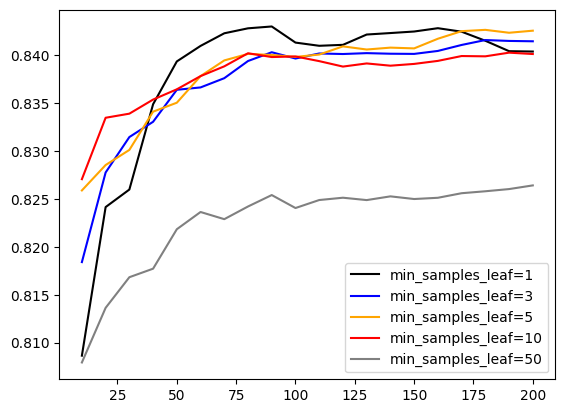

In [81]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [82]:
min_samples_leaf = 3

In [83]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


6.7 Gradient boosting and XGBoost
- Gradient boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output

**Gradient Boosting**

Unlike Random Forest where each decision tree trains independently, in the Gradient Boosting Trees, the models are combined sequentially, where each model takes the prediction errors made by the previous model and then tries to improve the prediction. This process continues to `n` number of iterations, and in the end, all the predictions get combined to make the final prediction.

XGBoost is one of the libraries which implements the gradient boosting technique. To make use of the library, we need to install with `pip install xgboost`. To train and evaluate the model, we need to wrap our train and validation data into a special data structure from XGBoost which is called `DMatrix`. This data structure is optimized to train XGBoost models faster.

**XGBoost Training Parameters**

*   `eta`: learning rate, which indicates how fast the model learns.
*   `max_depth`: to control the size of the trees.
*   `min_child_weight`: to control the minimum size of a child node.
*   `objective`: To specify which problem we are trying to solve, either regression, or classification (binary: `'binary:logistic'`, or other).
*   `nthread`: 8, used for parallelized training.
*   `seed`: 1, for reproducibility.
*   `verbosity`: 1 (`True`) to show warnings, if any, during model training.

**Classes, functions, and methods**:

- `xgb.train()`: method to train xgboost model.
- `xgb_params`: key-value pairs of hyperparameters to train xgboost model.
- `watchlist`: list to store training and validation data to evaluate the performance of the model after each training iteration. The list takes tuple of train and validation set from DMatrix wrapper, for example, `watchlist = [(dtrain, 'train'), (dval, 'val')]`.
- `%%capture output`: IPython magic command which captures the standard output and standard error of a cell.

In [84]:
import xgboost as xgb

In [85]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [86]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [87]:
y_pred = model.predict(dval)

In [89]:
roc_auc_score(y_val, y_pred)

0.8282333526990445

In [90]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [91]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [92]:
s = output.stdout

In [93]:
s

'[0]\ttrain-auc:0.85945\tval-auc:0.79388\n[5]\ttrain-auc:0.92831\tval-auc:0.82671\n[10]\ttrain-auc:0.94937\tval-auc:0.82753\n[15]\ttrain-auc:0.96295\tval-auc:0.82831\n[20]\ttrain-auc:0.97147\tval-auc:0.82688\n[25]\ttrain-auc:0.97790\tval-auc:0.82658\n[30]\ttrain-auc:0.98415\tval-auc:0.82296\n[35]\ttrain-auc:0.98995\tval-auc:0.81924\n[40]\ttrain-auc:0.99269\tval-auc:0.81657\n[45]\ttrain-auc:0.99571\tval-auc:0.81827\n[50]\ttrain-auc:0.99697\tval-auc:0.81727\n[55]\ttrain-auc:0.99783\tval-auc:0.81505\n[60]\ttrain-auc:0.99862\tval-auc:0.81484\n[65]\ttrain-auc:0.99903\tval-auc:0.81359\n[70]\ttrain-auc:0.99939\tval-auc:0.81418\n[75]\ttrain-auc:0.99972\tval-auc:0.81300\n[80]\ttrain-auc:0.99984\tval-auc:0.81396\n[85]\ttrain-auc:0.99991\tval-auc:0.81325\n[90]\ttrain-auc:0.99996\tval-auc:0.81319\n[95]\ttrain-auc:0.99997\tval-auc:0.81142\n[100]\ttrain-auc:0.99999\tval-auc:0.81241\n[105]\ttrain-auc:1.00000\tval-auc:0.81154\n[110]\ttrain-auc:1.00000\tval-auc:0.81192\n[115]\ttrain-auc:1.00000\tval-au

In [94]:
print(s[:200])

[0]	train-auc:0.85945	val-auc:0.79388
[5]	train-auc:0.92831	val-auc:0.82671
[10]	train-auc:0.94937	val-auc:0.82753
[15]	train-auc:0.96295	val-auc:0.82831
[20]	train-auc:0.97147	val-auc:0.82688
[25]	tr


In [95]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [96]:
parse_xgb_output(output)

,num_iter,train_auc,val_auc
0,0,0.85945,0.79388
1,5,0.92831,0.82671
2,10,0.94937,0.82753
3,15,0.96295,0.82831
4,20,0.97147,0.82688
5,25,0.97790,0.82658
6,30,0.98415,0.82296
7,35,0.98995,0.81924
8,40,0.99269,0.81657
9,45,0.99571,0.81827


In [97]:
df_score = parse_xgb_output(output)

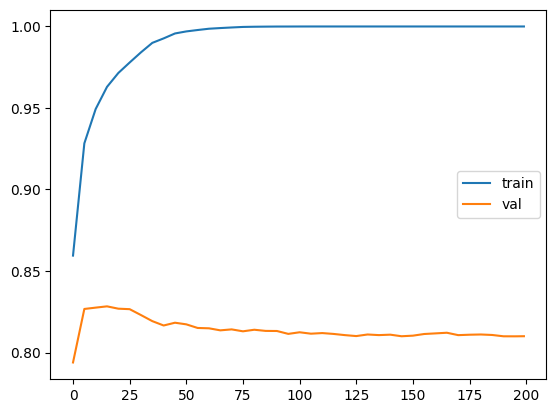

In [98]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

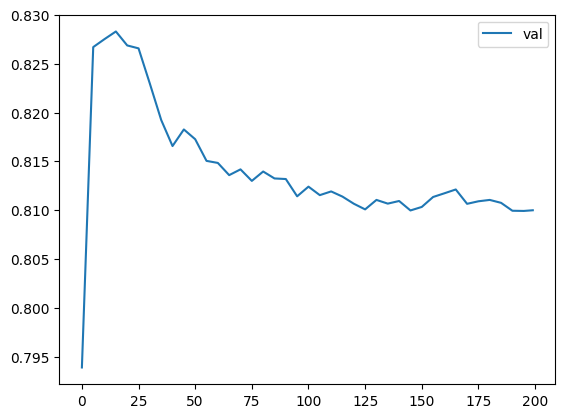

In [99]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

[0]	train-auc:0.85945	val-auc:0.79388
[5]	train-auc:0.92831	val-auc:0.82671
[10]	train-auc:0.94937	val-auc:0.82753
[15]	train-auc:0.96295	val-auc:0.82831
[20]	train-auc:0.97147	val-auc:0.82688
[25]	train-auc:0.97790	val-auc:0.82658
[30]	train-auc:0.98415	val-auc:0.82296
[35]	train-auc:0.98995	val-auc:0.81924
[40]	train-auc:0.99269	val-auc:0.81657
[45]	train-auc:0.99571	val-auc:0.81827
[50]	train-auc:0.99697	val-auc:0.81727
[55]	train-auc:0.99783	val-auc:0.81505
[60]	train-auc:0.99862	val-auc:0.81484
[65]	train-auc:0.99903	val-auc:0.81359
[70]	train-auc:0.99939	val-auc:0.81418
[75]	train-auc:0.99972	val-auc:0.81300
[80]	train-auc:0.99984	val-auc:0.81396
[85]	train-auc:0.99991	val-auc:0.81325
[90]	train-auc:0.99996	val-auc:0.81319
[95]	train-auc:0.99997	val-auc:0.81142
[100]	train-auc:0.99999	val-auc:0.81241
[105]	train-auc:1.00000	val-auc:0.81154
[110]	train-auc:1.00000	val-auc:0.81192
[115]	train-auc:1.00000	val-auc:0.81139
[120]	train-auc:1.00000	val-auc:0.81066
[125]	train-auc:1.0000

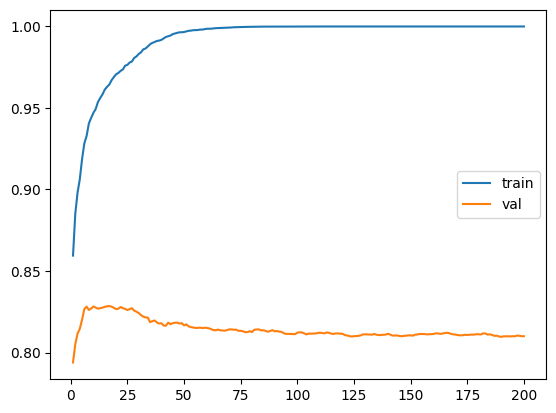

In [100]:
evals_result = {}

model = xgb.train(params=xgb_params,
                  dtrain=dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(evals_result['train'].values())[0]
val_aucs = list(evals_result['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

6.8 XGBoost parameter tuning
Tuning the following parameters:
- eta
- max_depth
- min_child_weight

XGBoost has various tunable parameters but the three most important ones are:

- `eta` (default=0.3)
  - It is also called `learning_rate` and is used to prevent overfitting by regularizing the weights of new features in each boosting step. range: [0, 1]
- `max_depth` (default=6)
  - Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. range: [0, inf]
- `min_child_weight` (default=1)
  - Minimum number of samples in leaf node. range: [0, inf]

For XGBoost models, there are other ways of finding the best parameters as well but the one we implement in the notebook follows the sequence of:

- First find the best value for `eta`
- Second, find the best value for `max_depth`
- Third, find the best value for `min_child_weight`

Other useful parameter are:

- `subsample` (default=1)
  - Subsample ratio of the training instances. Setting it to 0.5 means that model would randomly sample half of the training data prior to growing trees. range: (0, 1]
- `colsample_bytree` (default=1)
  - This is similar to random forest, where each tree is made with the subset of randomly choosen features.
- `lambda` (default=1)
  - Also called `reg_lambda`. L2 regularization term on weights. Increasing this value will make model more conservative.
- `alpha` (default=0)
  - Also called `reg_alpha`. L1 regularization term on weights. Increasing this value will make model more conservative.

In [101]:
scores = {}

In [102]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [103]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [111]:
%%capture output

xgb_params = {
    'eta': 0.2, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [112]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.2'

In [113]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.1', 'eta=0.2'])

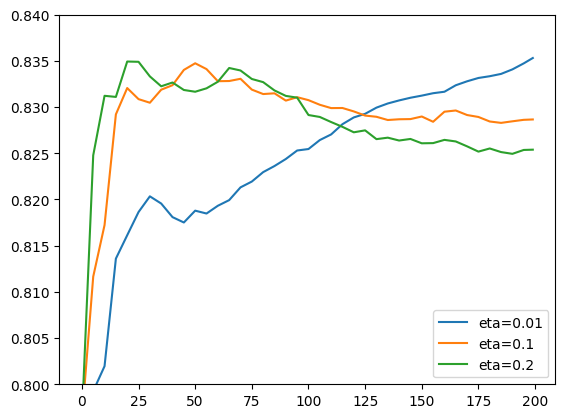

In [114]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.ylim(0.8, 0.84)
plt.legend()

In [115]:
scores = {}

In [125]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [126]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [129]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6'])

In [128]:
del scores['max_depth=10']

/tmp/ipykernel_2248/3766636055.py:4: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0.84, 0.84)


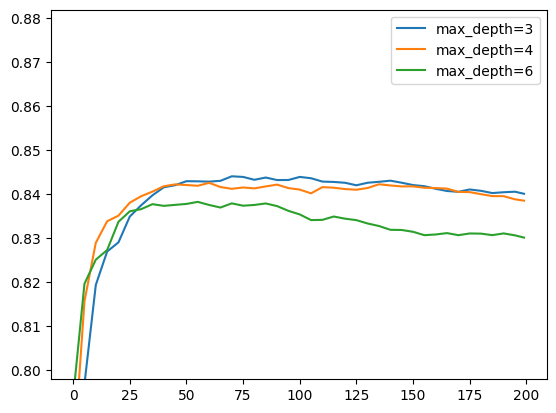

In [131]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.84, 0.84)
plt.legend()

Alternative: Tuning XGBoost using a loop

In [132]:
# Train XGBoost models for each eta and store AUC results
scores = {} # dictionary to store results for each eta
etas = [0.01, 0.05, 0.1, 0.3, 1.0] # list of parameter values. in this case it is 'eta'.

for eta in etas:
    evals_result = {}

    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }

    model = xgb.train(
        xgb_params,
        dtrain,
        evals=watchlist,
        verbose_eval=0,
        num_boost_round=200,
        evals_result=evals_result
    )

    columns = ['iter', 'train_auc', 'val_auc']
    train_aucs = list(evals_result['train'].values())[0]
    val_aucs = list(evals_result['val'].values())[0]

    df_results = pd.DataFrame(
        list(zip(range(1, len(train_aucs) + 1), train_aucs, val_aucs)),
        columns=columns
    )

    key = f'eta={eta}'
    scores[key] = df_results

In [133]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

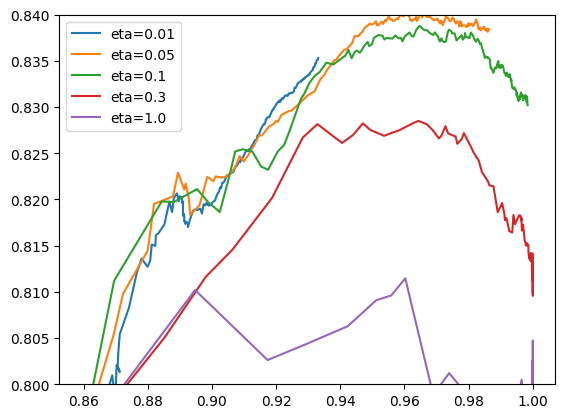

In [135]:
for key, df_score in scores.items():
    plt.plot(df_score.train_auc , df_score.val_auc, label=key)

plt.ylim(0.8, 0.84)
plt.legend()

Lets go to the final param

In [140]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

6.9 Selecting the final model
- Choosing between xgboost, random forest and decision tree
- Training the final model
- Saving the model

Generally, XGBoost models perform better on tabular data than other machine learning models but the downside is that these model are easy to overfit cause of the high number of hyperparameter. Therefore, XGBoost models require a lot more attention for parameters tuning to optimize them.

In [136]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [137]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7949480216071891

In [138]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=3, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [139]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8414442700156985

In [142]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [143]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8409065625038628

In [146]:
df_full_train = df_full_train.reset_index(drop=True)

In [147]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [148]:
del df_full_train['status']

In [149]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [151]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [153]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [154]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [155]:
y_pred = model.predict(dtest)

In [156]:
roc_auc_score(y_test, y_pred)

0.8334907182729892